## Kaggle - Web Traffic Time Series Forecasting

## Model 06 - Convolutional Neural Network

### v2 self validation testing

by Louis Yang

Original model "model_6_CNN_0_initial_1_filter_3"

In [4]:
model_name = 'model_06_CNN_2_validation'

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Input

In [6]:
print('%%% Reading data train_1.csv ... ', end = '', flush = True)
input_df = pd.read_csv("../data/train_1.csv")
print('done!')

%%% Reading data train_1.csv ... done!


In [7]:
input_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [8]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


## Processing Data
Generate training set and test (predict) set

### Day of week alignment

In [9]:
from datetime import datetime
def weekday(datestr):
    return datetime.strptime(datestr,'%Y-%m-%d').weekday()
def daydiff(dstr1,dstr2):
    return datetime.strptime(dstr1,'%Y-%m-%d') - datetime.strptime(dstr2,'%Y-%m-%d') 

We need to predict output (Y_output_pred) start from Sunday (6) for data set 1. (0: Monday, 6: Sunday)

In [10]:
# We take the x_length + y_length days of data only
# This part then split into x_length as input X and y_length as output Y
x_length = 63  # input period
y_length = 63  # predict period

Shift everything forward by y_length = 63 days to allows self testing without Kaggle

In [11]:
X_input_first_day = input_df.columns[-x_length-y_length-364]
X_input_final_day = input_df.columns[-1-y_length-364]
X_input_first_day, X_input_final_day

('2015-08-30', '2015-10-31')

In [12]:
daydiff(X_input_first_day, X_input_final_day)

datetime.timedelta(-62)

In [13]:
X_output_first_day = input_df.columns[-x_length-y_length]
X_output_final_day = input_df.columns[-1-y_length]
X_output_first_day, X_output_final_day

('2016-08-28', '2016-10-29')

In [14]:
daydiff(X_output_first_day, X_output_final_day)

datetime.timedelta(-62)

In [15]:
weekday(X_input_first_day), weekday(X_output_first_day)

(6, 6)

Both are Wednesday (2).

Y_output_first_day = '2017-01-01'; Y_output_final_day = '2017-03-01'
daydiff(Y_output_first_day,Y_output_final_day)

In [16]:
Y_input_first_day = input_df.columns[-364-y_length]
Y_input_final_day = input_df.columns[-1-364]
Y_input_first_day, Y_input_final_day

('2015-11-01', '2016-01-02')

In [17]:
daydiff(Y_input_first_day, Y_input_final_day)

datetime.timedelta(-62)

In [18]:
Y_output_first_day = input_df.columns[-y_length]
Y_output_final_day = input_df.columns[-1]
Y_output_first_day, Y_output_final_day

('2016-10-30', '2016-12-31')

In [19]:
daydiff(Y_output_first_day, Y_output_final_day)

datetime.timedelta(-62)

In [20]:
weekday(Y_input_first_day), weekday(Y_output_first_day)

(6, 6)

Both are Sunday (6).

### Data range reduce
Select x_length + y_length days of data as training set

where x_length = 60, y_length = 60 by default for training set 1.

In [21]:
X_input_first_day, Y_input_final_day

('2015-08-30', '2016-01-02')

input_data contains X_input and Y_input array

In [22]:
input_date_range = input_df.columns[-x_length-y_length-364:-364]; input_date_range

Index(['2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03',
       '2015-09-04', '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08',
       ...
       '2015-12-24', '2015-12-25', '2015-12-26', '2015-12-27', '2015-12-28',
       '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-01', '2016-01-02'],
      dtype='object', length=126)

In [26]:
input_data = input_df[input_date_range].values; input_data

array([[  9.,  10.,   9., ...,  18.,   9.,  16.],
       [ 22.,  11.,  81., ...,   9.,   7.,  15.],
       [  1.,   3.,   4., ...,   2.,   2.,   0.],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [27]:
input_data_num = np.nan_to_num(input_data); input_data_num

array([[  9.,  10.,   9., ...,  18.,   9.,  16.],
       [ 22.,  11.,  81., ...,   9.,   7.,  15.],
       [  1.,   3.,   4., ...,   2.,   2.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [28]:
input_data_num.shape

(145063, 126)

In [29]:
X_output_first_day, Y_output_final_day

('2016-08-28', '2016-12-31')

output_data for this self-testing script contains both X_output and Y_output

In [30]:
output_date_range = input_df.columns[-x_length-y_length:]; output_date_range

Index(['2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01',
       '2016-09-02', '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=126)

In [31]:
output_data = input_df[output_date_range].values; output_data

array([[  18.,   26.,    8., ...,   19.,   18.,   20.],
       [  25.,   22.,  144., ...,   45.,   26.,   20.],
       [   3.,    5.,    4., ...,    3.,    4.,   17.],
       ..., 
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [32]:
output_data_num = np.nan_to_num(output_data); output_data_num

array([[  18.,   26.,    8., ...,   19.,   18.,   20.],
       [  25.,   22.,  144., ...,   45.,   26.,   20.],
       [   3.,    5.,    4., ...,    3.,    4.,   17.],
       ..., 
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [33]:
output_data_num.shape

(145063, 126)

### View

In [34]:
def arr_info(arr_list):
    for arr in arr_list:
        print(arr.shape, arr.min(), arr.max(), np.median(arr), arr.std())

In [35]:
def view(x, xlim=None, ylim=None, yscale='linear', title=None, show=True):
    plt.yscale(yscale)
    plt.plot(x)
    if ylim: plt.ylim(ylim)
    if xlim: plt.xlim(xlim)
    if title: plt.title(title)
    if show: plt.show()
def viewi(X, i, xlim=None, ylim=None, yscale='linear', show=True):
    view(X[i], xlim=xlim, ylim=ylim, yscale=yscale, title='i = ' + str(i), show=show)
def examine(X, n=5, xlim=None, ylim=None):
    '''randomly show some example in feature and label'''
    n_X = len(X)
    view_list = np.random.choice(n_X, min(n, n_X), replace=False)
    for i in view_list:
        viewi(X, i, xlim=xlim, ylim=ylim)
    return view_list

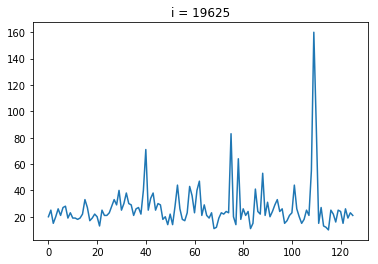

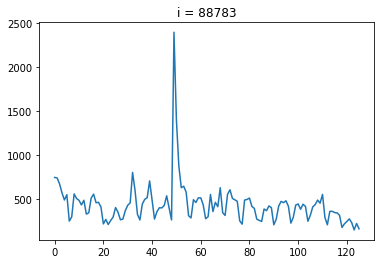

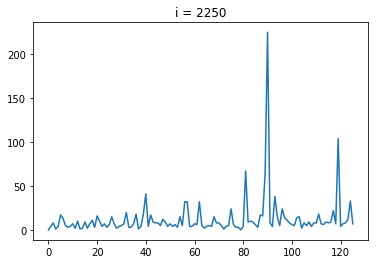

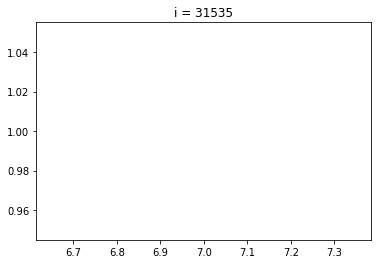

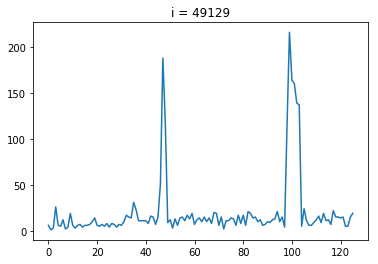

array([19625, 88783,  2250, 31535, 49129])

In [36]:
examine(input_data)

### Log

In [37]:
def log(X):
    return np.log10(X + 1.0)
def unlog(X):
    return np.clip(np.power(10., X) - 1.0, 0.0, None)

In [38]:
input_data_log = log(input_data_num); input_data_log

array([[ 1.        ,  1.04139269,  1.        , ...,  1.2787536 ,
         1.        ,  1.23044892],
       [ 1.36172784,  1.07918125,  1.91381385, ...,  1.        ,
         0.90308999,  1.20411998],
       [ 0.30103   ,  0.60205999,  0.69897   , ...,  0.47712125,
         0.47712125,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
input_data_log.shape, input_data.shape

((145063, 126), (145063, 126))

In [40]:
output_data_log = log(output_data_num); output_data_log

array([[ 1.2787536 ,  1.43136376,  0.95424251, ...,  1.30103   ,
         1.2787536 ,  1.32221929],
       [ 1.41497335,  1.36172784,  2.161368  , ...,  1.66275783,
         1.43136376,  1.32221929],
       [ 0.60205999,  0.77815125,  0.69897   , ...,  0.60205999,
         0.69897   ,  1.25527251],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
output_data_log.shape, output_data.shape

((145063, 126), (145063, 126))

In [42]:
# Check inverse log transformation
input_data_log_tt = unlog(input_data_log)
input_data_log_tt_dif = input_data_log_tt - input_data_num
input_data_log_tt_dif.min(), input_data_log_tt_dif.max()

(-1.862645149230957e-08, 1.862645149230957e-08)

In [43]:
# Check inverse log transformation
output_data_log_tt = unlog(output_data_log)
output_data_log_tt_dif = output_data_log_tt - output_data_num
output_data_log_tt_dif.min(), output_data_log_tt_dif.max()

(-2.9802322387695313e-08, 2.6077032089233398e-08)

### Normalization (Shift and Scale)

In [44]:
input_center = np.nanmedian(input_data_log[:,:x_length], axis=-1).reshape(-1,1)
input_center  # remember sample-wised center

array([[ 1.04139269],
       [ 1.23044892],
       [ 0.60205999],
       ..., 
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [45]:
input_scale = np.nanstd(input_data_log[:,:x_length], axis=-1).reshape(-1,1)
input_scale[input_scale == 0.0] = 1.0  # Prevent divid by zero
input_scale  # remember sample-wised scale

array([[ 0.22974401],
       [ 0.23685744],
       [ 0.27363311],
       ..., 
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [46]:
output_center = np.nanmedian(output_data_log[:,:x_length], axis=-1).reshape(-1,1)
output_center  # remember sample-wised center

array([[ 1.2787536 ],
       [ 1.44715803],
       [ 0.69897   ],
       ..., 
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [47]:
output_scale = np.nanstd(output_data_log[:,:x_length], axis=-1).reshape(-1,1)
output_scale[output_scale == 0.0] = 1.0  # Prevent divid by zero
output_scale  # remember sample-wised scale

array([[ 0.19725496],
       [ 0.25052371],
       [ 0.21878369],
       ..., 
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [48]:
# Check if there is any 0. in input_scale
[i for i in range(len(input_scale)) if input_scale[i] == 0.]

[]

In [49]:
def transform(data_ori, center, scale):
    return (data_ori - center) / scale
def untransform(data, center, scale):
    return data * scale + center

In [50]:
# Normalize the input_data and output_data
input_data_norm = transform(input_data_log, input_center, input_scale)
output_data_norm = transform(output_data_log, output_center, output_scale)

In [51]:
def check_nan(X):
    return [x for x in X if np.isnan(x).any()]

In [52]:
check_nan(input_data_norm), check_nan(output_data_norm)  # Check if there is any nan in the input_data

([], [])

In [53]:
# Check inverse scale transformation
input_data_norm_it = untransform(input_data_norm, input_center, input_scale)
input_data_norm_it_dif = input_data_norm_it - input_data_log
input_data_norm_it_dif.min(), input_data_norm_it_dif.max()

(-8.8817841970012523e-16, 8.8817841970012523e-16)

In [54]:
# Check inverse scale transformation
output_data_norm_it = untransform(output_data_norm, output_center, output_scale)
output_data_norm_it_dif = output_data_norm_it - output_data_log
output_data_norm_it_dif.min(), output_data_norm_it_dif.max()

(-8.8817841970012523e-16, 8.8817841970012523e-16)

### Make (X,Y) pairs data from data set

In [55]:
day_shift = 0

In [56]:
def make_XY(data, x_length=x_length, y_length=y_length, shift=day_shift):
    if shift == 0:
        return data[:, -x_length-y_length:-y_length], data[:, -y_length:]
    else:
        return data[:, -x_length-y_length-shift:-y_length-shift], data[:, -y_length-shift:-shift]

In [57]:
X_input, Y_input = make_XY(input_data_norm)
X_input.shape, Y_input.shape

((145063, 63), (145063, 63))

In [58]:
X_input, input_data_norm[:,:x_length]

(array([[-0.18016872,  0.        , -0.18016872, ..., -0.60198609,
         -0.18016872,  0.        ],
        [ 0.55425286, -0.63864439,  2.88513179, ...,  0.1048039 ,
          1.42597506, -0.35599847],
        [-1.10012268,  0.        ,  0.3541604 , ..., -1.10012268,
          1.60555382,  0.64353051],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[-0.18016872,  0.        , -0.18016872, ..., -0.60198609,
         -0.18016872,  0.        ],
        [ 0.55425286, -0.63864439,  2.88513179, ...,  0.1048039 ,
          1.42597506, -0.35599847],
        [-1.10012268,  0.        ,  0.3541604 , ..., -1.10012268,
          1.60555382,  0.64353051],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

In [59]:
Y_input, input_data_norm[:,-y_length:]

(array([[ 1.55193306, -0.85440594, -0.85440594, ...,  1.03315389,
         -0.18016872,  0.82289953],
        [-0.63864439, -0.22949527, -0.22949527, ..., -0.97294356,
         -1.38209268, -0.11115943],
        [ 0.88818946, -0.45659217,  0.64353051, ..., -0.45659217,
         -0.45659217, -2.20024536],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 1.55193306, -0.85440594, -0.85440594, ...,  1.03315389,
         -0.18016872,  0.82289953],
        [-0.63864439, -0.22949527, -0.22949527, ..., -0.97294356,
         -1.38209268, -0.11115943],
        [ 0.88818946, -0.45659217,  0.64353051, ..., -0.45659217,
         -0.45659217, -2.20024536],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

In [60]:
X_output, Y_output = make_XY(output_data_norm)
X_output.shape, Y_output.shape

((145063, 63), (145063, 63))

In [61]:
X_output, output_data_norm[:,:x_length]

(array([[ 0.        ,  0.77366959, -1.64513527, ...,  0.22035286,
         -0.83551891,  0.11293199],
        [-0.12846961, -0.34100642,  2.85086773, ..., -0.41806562,
          0.        ,  0.33657846],
        [-0.44294898,  0.36191567,  0.        , ..., -0.44294898,
         -0.44294898, -1.01400955],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.        ,  0.77366959, -1.64513527, ...,  0.22035286,
         -0.83551891,  0.11293199],
        [-0.12846961, -0.34100642,  2.85086773, ..., -0.41806562,
          0.        ,  0.33657846],
        [-0.44294898,  0.36191567,  0.        , ..., -0.44294898,
         -0.44294898, -1.01400955],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

In [62]:
Y_output, output_data_norm[:,-y_length:]

(array([[ 2.17392037, -0.24488449,  1.07783395, ...,  0.11293199,
          0.        ,  0.22035286],
        [-0.97011993, -0.19646053, -1.2016028 , ...,  0.86059638,
         -0.063045  , -0.49871022],
        [-1.01400955,  0.66791101, -1.8188742 , ..., -0.44294898,
          0.        ,  2.54270555],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 2.17392037, -0.24488449,  1.07783395, ...,  0.11293199,
          0.        ,  0.22035286],
        [-0.97011993, -0.19646053, -1.2016028 , ...,  0.86059638,
         -0.063045  , -0.49871022],
        [-1.01400955,  0.66791101, -1.8188742 , ..., -0.44294898,
          0.        ,  2.54270555],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

### Split Data into Training and (Pseudo) Cross Validation Sets

In [63]:
def make_shuffle_index(n, seed=None):
    shuffle_index = np.array(list(range(n)))
    np.random.seed(seed)  # you can fix the initial seed for comparison purpose
    np.random.shuffle(shuffle_index)
    return shuffle_index

In [64]:
def using(array_ori, index_list):
    #return np.array([array_ori[i] for i in index_list])
    return np.take(array_ori, index_list, axis=0)

In [65]:
# Generate a shuffle list
shuffle_index = make_shuffle_index(len(X_input), seed=123)

Keep 10% of input data as validation set

In [66]:
# Split the index list into training and validation sets
n_val = int(len(X_input) * 0.1)
val_index = shuffle_index[:n_val]
train_index = shuffle_index[n_val:]

In [67]:
# Split the data sets according to the index list
X_train = using(X_input, train_index)
Y_train = using(Y_input, train_index)
X_val = using(X_input, val_index)
Y_val = using(Y_input, val_index)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((130557, 63), (130557, 63), (14506, 63), (14506, 63))

#### Split the untransformed data
Split the untransformed data in the same way for score estimation

In [68]:
train_data_num = using(input_data_num, train_index)
val_data_num = using(input_data_num, val_index)

In [69]:
X_train_ori, Y_train_ori = make_XY(train_data_num)
X_val_ori, Y_val_ori = make_XY(val_data_num)
X_train_ori.shape, Y_train_ori.shape, X_val_ori.shape, Y_val_ori.shape

((130557, 63), (130557, 63), (14506, 63), (14506, 63))

In [70]:
train_center = using(input_center, train_index)
val_center = using(input_center, val_index)
train_scale = using(input_scale, train_index)
val_scale = using(input_scale, val_index)
train_center.shape, val_center.shape, train_scale.shape, val_scale.shape

((130557, 1), (14506, 1), (130557, 1), (14506, 1))

#### Check if the inverse transformation is correct

In [71]:
# Undo transformation
X_train_tt = unlog(untransform(X_train, train_center, train_scale))

In [72]:
X_train_tt_diff = X_train_tt - X_train_ori
X_train_tt_diff.min(), X_train_tt_diff.max()

(-1.862645149230957e-08, 1.862645149230957e-08)

## Neural Network?

In [73]:
from keras.models import Sequential
#from keras.layers import Conv1D
from keras.layers import Dense, Dropout, Flatten
from keras.losses import mean_squared_error
from keras.optimizers import Adam

Using TensorFlow backend.


### SMAPE
Symmetric mean absolute percentage error

https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

In [74]:
import keras.backend as K

def k_smape(y_true, y_pred):
    '''Symmetric mean absolute percentage error for keras metric'''
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true) + K.abs(y_pred),
                                            K.epsilon(),
                                            None))
    return 200. * K.mean(diff, axis=-1)

In [75]:
def smape(y_true, y_pred, axis=None):
    '''Symmetric mean absolute percentage error'''
    diff = np.abs((y_true - y_pred) / 
                  np.clip(np.abs(y_true) + np.abs(y_pred), K.epsilon(),
                          None))
    return 200. * np.mean(diff, axis=axis)

In [76]:
# Benchmark SMAPE on the transformed data
smape(Y_train,X_train), smape(Y_val,X_val), smape(Y_train,Y_train)

(129.62139232017412, 129.45112637665144, 0.0)

In [77]:
# Benchmark SMAPE on the original data
smape(Y_train_ori,X_train_ori), smape(Y_val_ori,X_val_ori), \
smape(Y_train_ori,Y_train_ori)

(51.915041736663028, 51.513925445812511, 0.0)

Doing better than the first two scores are better than simply copy and past the previous result.

### Neural Network Model
With the flavor of convolutional neural network

In [78]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Reshape

In [79]:
layer_0 = Input(shape=(x_length,))

In [80]:
layer_t = Reshape((-1, 1))(layer_0)

In [81]:
layer_0, layer_t

(<tf.Tensor 'input_1:0' shape=(?, 63) dtype=float32>,
 <tf.Tensor 'reshape_1/Reshape:0' shape=(?, 63, 1) dtype=float32>)

layer_t = Conv1D(30, kernel_size=7, activation='relu')(layer_t)

In [82]:
layer_t = Conv1D(60, kernel_size=7, activation='relu')(layer_t)

In [83]:
layer_t = Flatten()(layer_t)

In [84]:
layer_t = Dense(120, activation='relu')(layer_t)

In [85]:
layer_t = Dropout(0.25)(layer_t)

In [86]:
layer_t = Dense(120, activation='relu')(layer_t)
layer_t = Dropout(0.5)(layer_t)
layer_f = Dense(y_length)(layer_t)

In [87]:
model = Model(inputs=layer_0, outputs=layer_f)
model.compile(optimizer='adam',
              loss='mean_squared_error', metrics=[k_smape])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 63)                0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 63, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 57, 60)            480       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3420)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               410520    
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
__________

About 5s for 1 epoch on i5-750 CPU

In [88]:
hist = model.fit(X_train, Y_train, batch_size=128, epochs=20, 
                 validation_data=(X_val, Y_val))

Train on 130557 samples, validate on 14506 samples
Epoch 1/20
130557/130557 [==============================] - 18s - loss: 2.8647 - k_smape: 143.0755 - val_loss: 2.4846 - val_k_smape: 137.7202
Epoch 2/20
130557/130557 [==============================] - 17s - loss: 2.7530 - k_smape: 139.6150 - val_loss: 2.4627 - val_k_smape: 138.8458
Epoch 3/20
130557/130557 [==============================] - 17s - loss: 2.7090 - k_smape: 139.3847 - val_loss: 2.4624 - val_k_smape: 140.0662
Epoch 4/20
130557/130557 [==============================] - 17s - loss: 2.6750 - k_smape: 139.0933 - val_loss: 2.4518 - val_k_smape: 138.7457
Epoch 5/20
130557/130557 [==============================] - 17s - loss: 2.6519 - k_smape: 138.8243 - val_loss: 2.4413 - val_k_smape: 137.1759
Epoch 6/20
130557/130557 [==============================] - 17s - loss: 2.6091 - k_smape: 138.8172 - val_loss: 2.4408 - val_k_smape: 138.7297
Epoch 7/20
130557/130557 [==============================] - 17s - loss: 2.5812 - k_smape: 138.667

In [89]:
model.evaluate(X_val,Y_val)

14304/14506 [============================>.] - ETA: 0s

[2.5476459300092347, 138.1616617431809]

### Training History

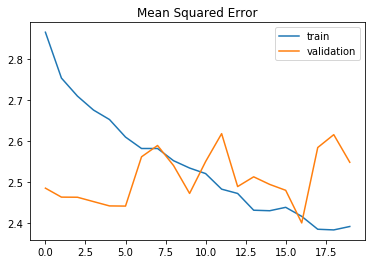

In [90]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Mean Squared Error')
plt.legend(); plt.show()

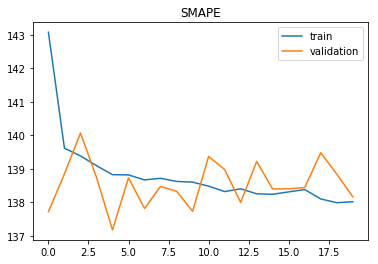

In [91]:
plt.plot(hist.history['k_smape'], label='train')
plt.plot(hist.history['val_k_smape'], label='validation')
plt.title('SMAPE')
plt.legend(); plt.show()

Overfit?

### Test Set

In [92]:
model.evaluate(X_output,Y_output)

145063/145063 [==============================] - 8s     


[3.7900786423031314, 137.46364956133905]

### More Training

hist2 = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
                 validation_data=(X_val, Y_val))

model.evaluate(X_val,Y_val)

plt.plot(hist2.history['loss'], label='train')
plt.plot(hist2.history['val_loss'], label='validation')
plt.title('Mean Squared Error')
plt.legend(); plt.show()

plt.plot(hist2.history['k_smape'], label='train')
plt.plot(hist2.history['val_k_smape'], label='validation')
plt.title('SMAPE')
plt.legend(); plt.show()

### Predict for Validation set

In [93]:
Y_val_pred = model.predict(X_val)

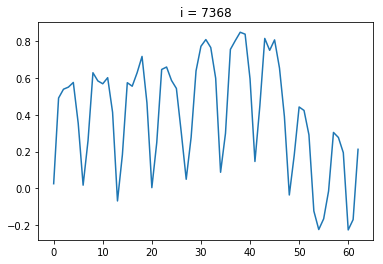

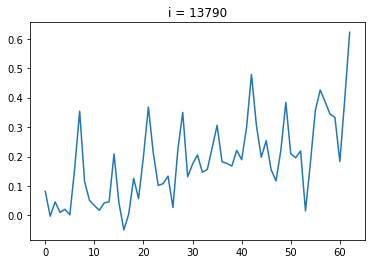

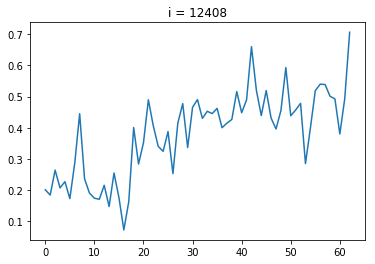

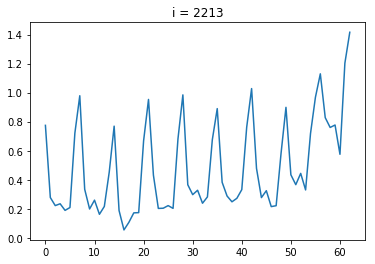

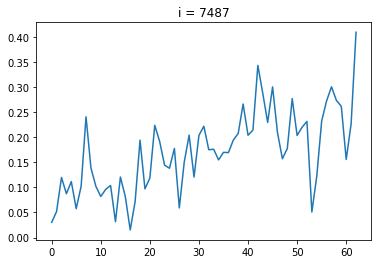

array([ 7368, 13790, 12408,  2213,  7487])

In [94]:
examine(Y_val_pred)

In [95]:
Y_val_pred_ori = unlog(untransform(Y_val_pred, val_center, val_scale))

In [96]:
# SMAPE of the validation set
smape(Y_val_ori, Y_val_pred_ori)

59.368424469757784

In [97]:
def view_val(i):
    plt.plot(Y_val_pred_ori[i])
    plt.plot(Y_val_ori[i])
    plt.plot(X_val_ori[i])
    plt.show()

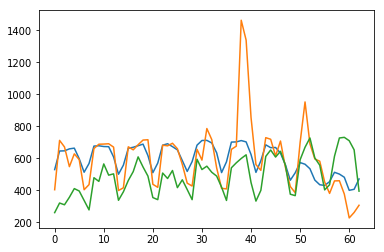

In [98]:
view_val(10)

### Predict for Output Set

In [99]:
Y_output_pred = model.predict(X_output)

In [100]:
Y_output_pred_ori = unlog(untransform(Y_output_pred, 
                                      output_center, output_scale))

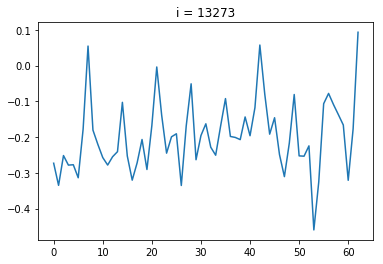

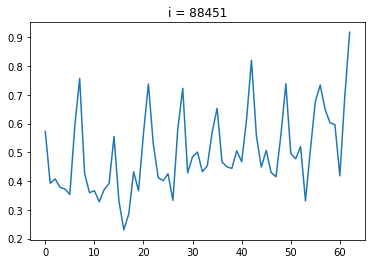

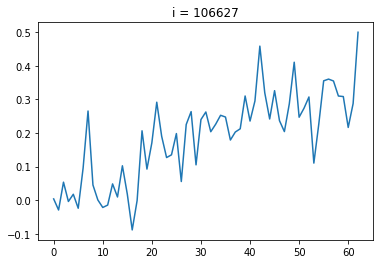

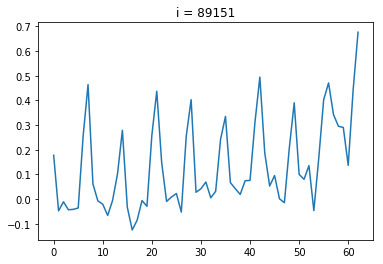

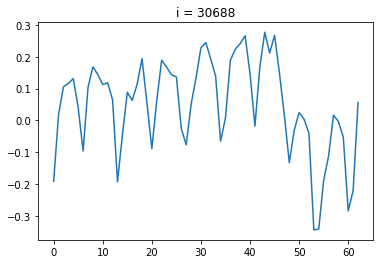

array([ 13273,  88451, 106627,  89151,  30688])

In [101]:
examine(Y_output_pred)

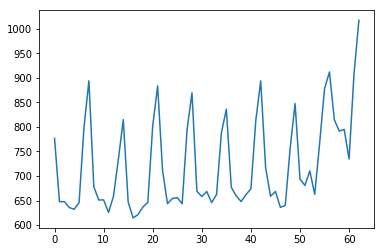

In [102]:
view(Y_output_pred_ori[28450])

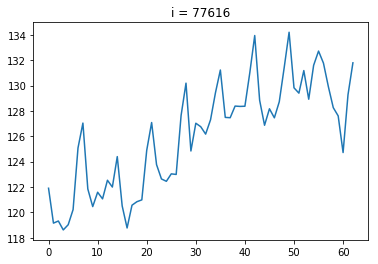

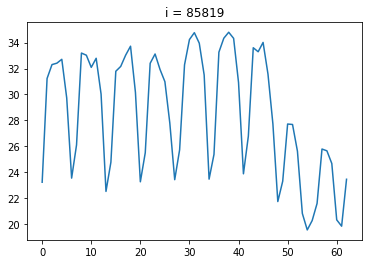

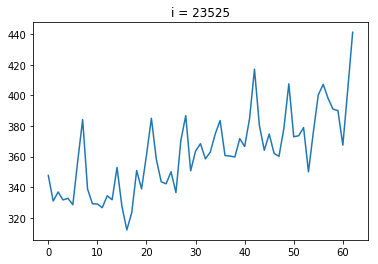

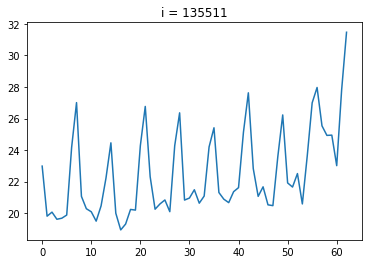

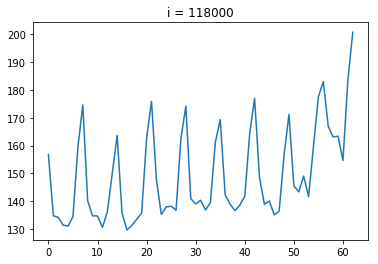

array([ 77616,  85819,  23525, 135511, 118000])

In [103]:
examine(Y_output_pred_ori)

## Test

In [104]:
Y_output_ori = output_data_num[:,-y_length:]

In [105]:
# SMAPE of the real test set
smape(Y_output_ori, Y_output_pred_ori)

50.522878182811901

## Output

print('%%% Reading data key_1.csv ...', end = '', flush = True)
output_df = pd.read_csv("../data/key_1.csv")
print('done!')

output_df['date'] = output_df.Page.apply(lambda a: a[-10:])  # take the last 10 characters from 'Page' as date
output_df['Page'] = output_df.Page.apply(lambda a: a[:-11])  # remove the last 10 caharacters from 'Page'
output_df['date'] = output_df['date'].astype('datetime64[ns]')  # convert 'date' string to numpy datetime format
#test['weekday'] = test.date.dt.dayofweek  # find the day of week using the 'date' column
output_df

output_df.info()

output_df['date'].values[0:62]  # Make sure the range is 60 days (see if the dates resume after 60)

predict_dates_index=pd.date_range(Y_output_first_day, 
                                  periods=np.timedelta64(y_length,'D'), 
                                  freq = 'D', unit = 'D')
predict_dates_index

result_df = pd.DataFrame(Y_output_pred_ori, columns = predict_dates_index)
result_df

result_df['Page'] = input_df['Page']  # Append 'Page' column from input_df
result_df

result_flat_df = pd.melt(result_df, id_vars='Page', var_name='date',
                         value_name='Visits')
result_flat_df

output_df = output_df.merge(result_flat_df, how='left')  # fill the 'Visits" from result
output_df

#Check if there is null value
output_df.loc[output_df.Visits.isnull(), 'Visits']

#output_df.loc[output_df.Visits.isnull(), 'Visits'] = 0.0  # Uncommend this line to Replace NaN with 0.0

print('%%% Writing result for ' + model_name + ' ...', 
      end = '', flush = True)
#Write only the 'Id' and 'Visits' to the result file
output_df[['Id','Visits']].to_csv('../results/submit_1_' + model_name
                                + '.csv', index = False)
print('done!')

Kaggle Score: 

[6.0.0] 46.3 [Model 6.0.0 CNN - Conv(60, 7)-FC(120)-Drop(0.25)-FC(120)-Drop(0.5)-Linear, 20 epoches]

[6.1.0] 46.7 [Model 6.1.0 CNN - Conv(30, 7)-Conv(60, 7)-FC(120)-Drop(0.25)-FC(120)-Drop(0.5)-Linear, 20 epoches]

## Compare

In [111]:
Y_input_ori = input_data[:,-y_length:]
X_input_ori = input_data[:,:x_length]
X_output_ori = output_data[:,:x_length]

In [107]:
def comp_view(x1, x2, title=None, show=True):
    plt.plot(x1)
    plt.plot(x2)
    if title: plt.title(title)
    if show: plt.show()

def comp_examine(data1, data2, view_n=10, view_list=None):
    n_data = len(data1)
    if not data1.shape == data2.shape: print(data1.shape, data2.shape, 'not the same length')
    if not view_list: view_list = np.random.choice(n_data, min(view_n, n_data), replace=False)
    for i in view_list:
        comp_view(data1[i], data2[i], title='i = ' + str(i))
    return list(view_list)

view_list = None

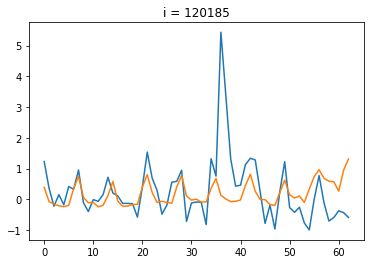

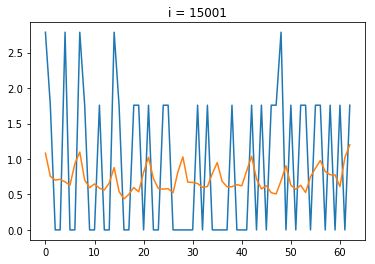

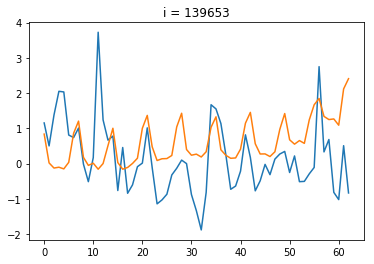

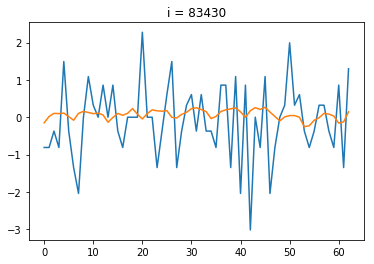

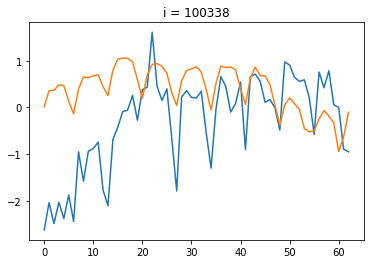

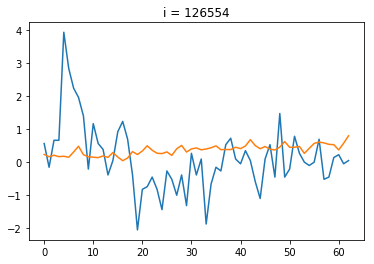

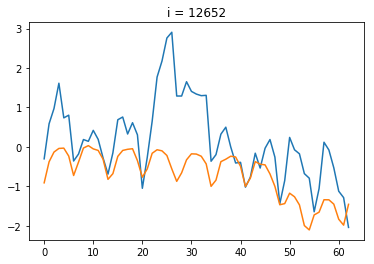

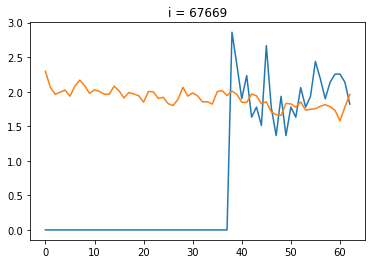

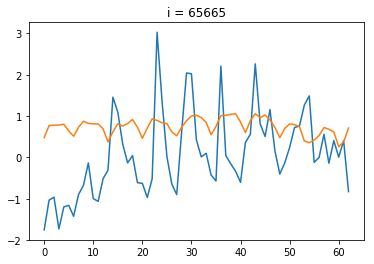

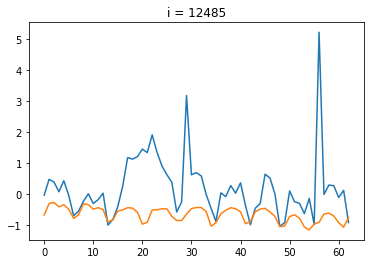

In [108]:
view_list = comp_examine(X_output, Y_output_pred, view_list=view_list)

In [109]:
view_list

[120185, 15001, 139653, 83430, 100338, 126554, 12652, 67669, 65665, 12485]

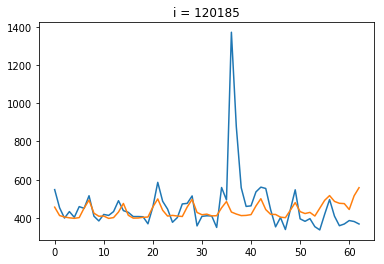

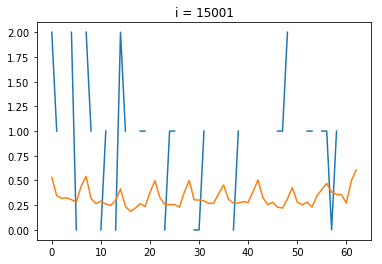

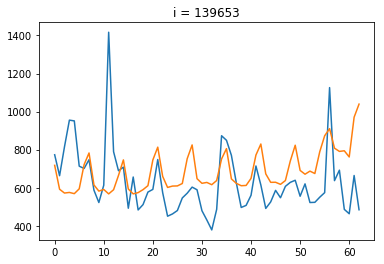

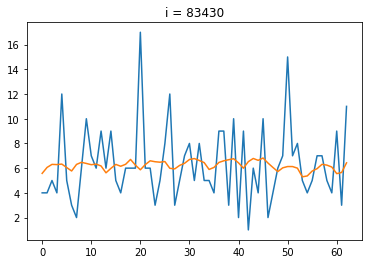

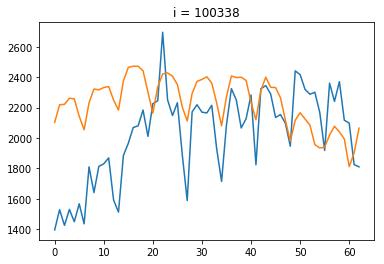

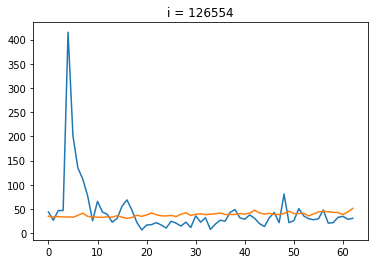

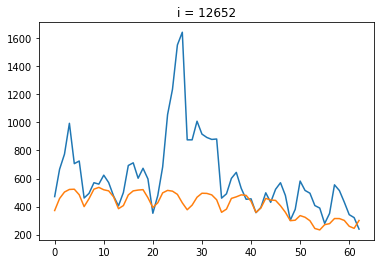

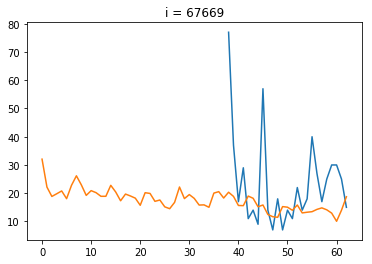

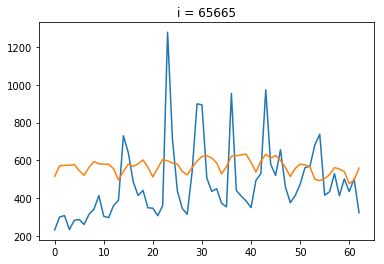

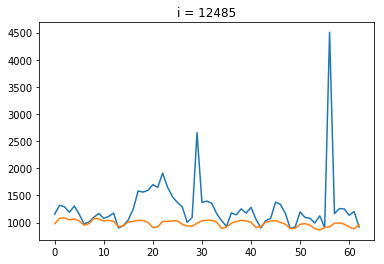

In [112]:
view_list = comp_examine(X_output_ori, Y_output_pred_ori, view_list=view_list)

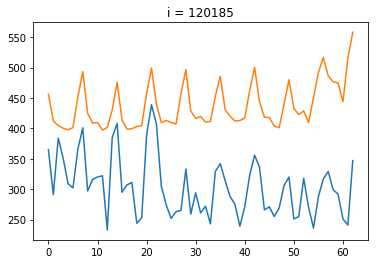

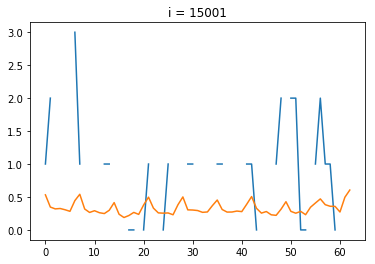

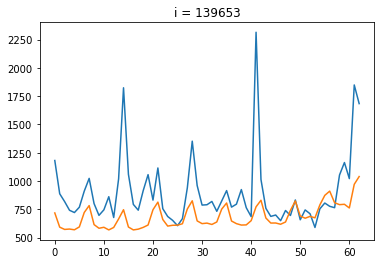

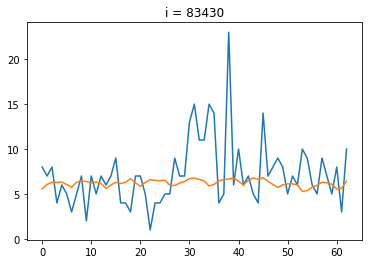

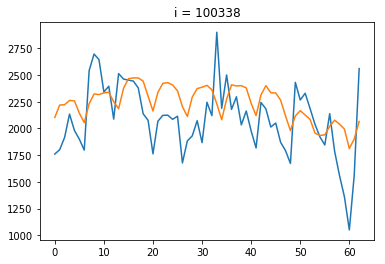

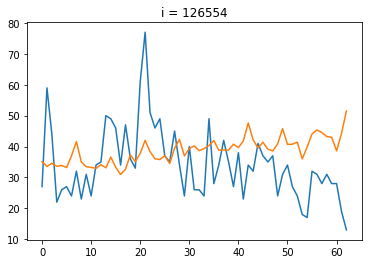

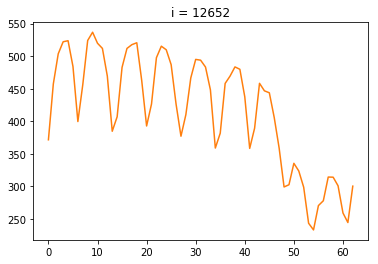

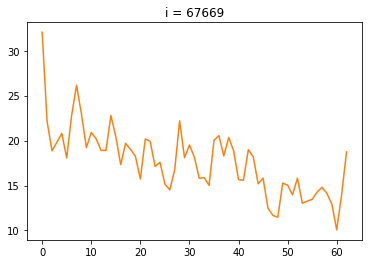

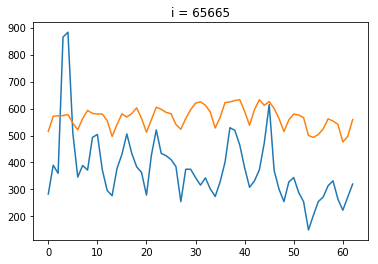

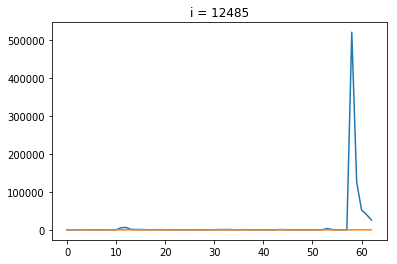

In [113]:
view_list = comp_examine(Y_input_ori, Y_output_pred_ori, view_list=view_list)

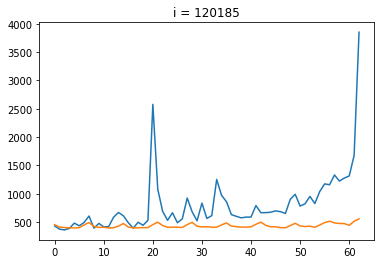

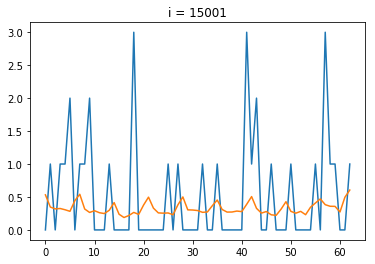

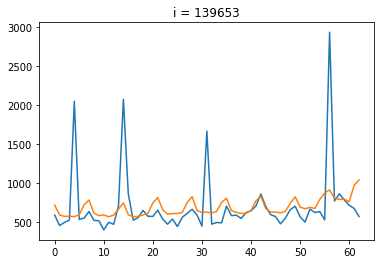

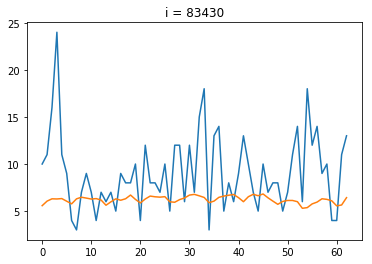

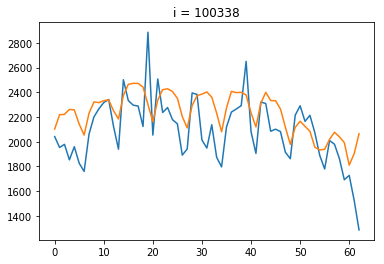

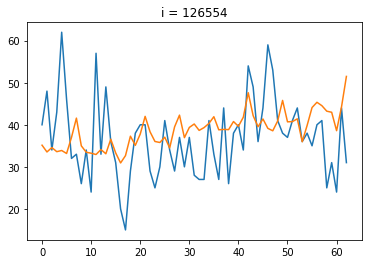

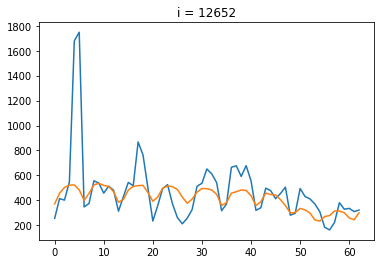

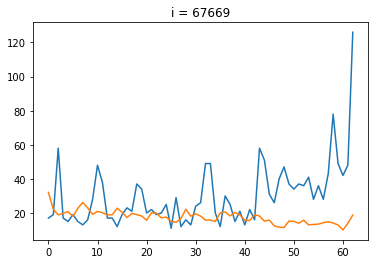

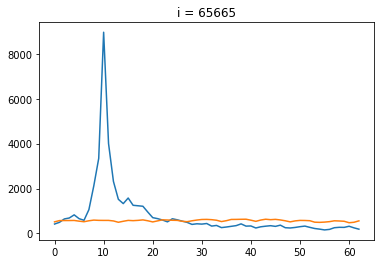

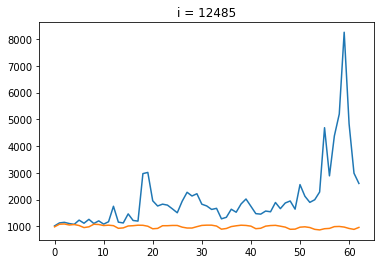

In [114]:
view_list = comp_examine(Y_output_ori, Y_output_pred_ori, view_list=view_list)

In [ ]:
input_df.iloc[:,-63*2:-63].values

In [ ]:
comp_examine(input_df.iloc[:,-63*2:-63].values,input_df.iloc[:,-63:].values, view_list=view_list)

#### Case 143557

In [ ]:
i = 143557

In [ ]:
comp_view(X_input[i], Y_input[i])

In [ ]:
comp_view(X_input_ori[i], Y_input_ori[i])

In [ ]:
comp_view(X_output[i], Y_output_pred[i])

In [ ]:
comp_view(X_input_ori[i], Y_input_ori[i])

In [ ]:
input_center[i], output_center[i], input_scale[i], output_scale[i]